<a href="https://colab.research.google.com/github/diperezp/Analisis_Se-al_2025_1/blob/main/Convolucion/lab1/Convolucion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#$Convolucion$


In [11]:
#app_15.1
import torch
import torch.nn as nn
from torch import optim
from torchvision.transforms import ToTensor
from torchvision import datasets, transforms
from torchvision.datasets import MNIST
from torchsummary import summary
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torch.autograd import Variable

##$Exploracion\ del\ dataset$




Shape train: torch.Size([60000, 28, 28])
Dim train: 3


Shape test: torch.Size([10000, 28, 28])
Dim test: 3


Shape de imagen de entrenamiento en la posición 50: torch.Size([1, 28, 28])
Dim de imagen de entrenamiento en la posición 50: torch.Size([1, 28, 28])
Etiqueta corresponsdiente a la imagen en la posición 50: 9


Los valores están ya normalizados entre -1 y 1:
Min: 0.0
Max: 1.0
Media: 0.13094238936901093


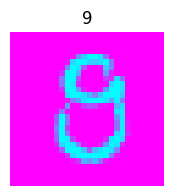

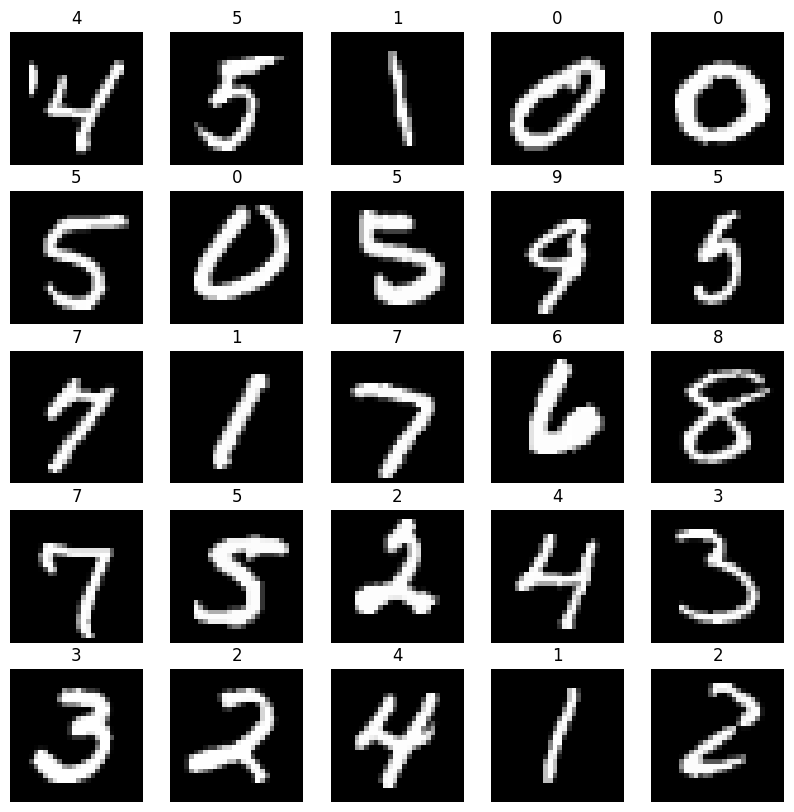

In [12]:
"""
EL DATASET
"""
# Cargar las imágenes MNIST.
# En la cargada se usó ToTensor para simultaneamente
# convertir las imágenes en tensores PyTorch
# normalizados [0.0, 1.0]
transform = transforms.Compose([transforms.Resize((28, 28)),transforms.ToTensor()])


train_data =datasets.MNIST('./data',train=True,transform=transform,download=True)
test_data =datasets.MNIST('./data',train=False,transform=transform,download=True)

# Explorar un poco el dataset
# Conjunto de entrenamiento
print("\n")
print("Shape train:", train_data.data.shape)
print("Dim train:", train_data.data.dim())
# Conjunto de testeo
print("\n")
print("Shape test:", test_data.data.shape)
print("Dim test:", test_data.data.dim())
# Explorar la imágen en la posición 50 de train
imagen, etiqueta = train_data[80]
print("\n")
print("Shape de imagen de entrenamiento en la posición 50:",imagen.shape)
print("Dim de imagen de entrenamiento en la posición 50:",imagen.shape)
print("Etiqueta corresponsdiente a la imagen en la posición 50:",etiqueta)
print("\n")
print("Los valores están ya normalizados entre -1 y 1:")
print(f"Min: {imagen.min()}")
print(f"Max: {imagen.max()}")
print(f"Media: {imagen.mean()}")
figure = plt.figure(figsize=(2, 2))
plt.title(etiqueta)
plt.axis("off")
# Matplotlib trabaja con la imagen (28,28,1 y Pytorch (1,28,28)
# por lo tanto hay que permutar
imagen = imagen.permute(1,2,0)
plt.imshow(imagen, cmap="cool_r")
plt.show()
# Desplegar un conjunto al azar de 25 imágenes de entrenamiento
figure = plt.figure(figsize=(10, 10))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    imagen, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    # Matplotlib trabaja con la imagen (28,28,1 y Pytorch (1,28,28)
    # por lo tanto hay que permutar
    imagen = imagen.permute(1,2,0)
    plt.imshow(imagen, cmap="gray")
plt.show()

##$Organizacion\ del\ dataset$

In [13]:
# Organizar el dataset en minilotes escogidos al azar para
# un mejor y mas rápido entrenamiento
torch.manual_seed(5) # semilla
loaders = {
'train' : torch.utils.data.DataLoader(train_data,
batch_size=32,
shuffle=True,
num_workers=0),
'test' : torch.utils.data.DataLoader(test_data,
batch_size=32,
shuffle=True,
num_workers=0),
}

##$primer\ acercamiento\ alas\ CNN\ (Arquitectura)$


In [18]:
# Por costumbre siempre indagar por la GPU, sin embargo, en este ejemplo se ejecutará en CPU
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(device)
"""
EL DATASET
"""
# Cargar las imágenes MNIST.
# En la cargada se usó ToTensor para simultaneamente
# convertir las imágenes en tensores PyTorch
# normalizados [0.0, 1.0]
transform = transforms.Compose([transforms.Resize((28, 28)),transforms.ToTensor()])

# Organizar el dataset en minilotes escogidos al azar para
# un mejor y mas rápido entrenamiento
torch.manual_seed(5) # semilla

# tamaño del lote
# MNIST consiste de 60K imágenes de entrenamiento y 10K imágenes de testeo
# Se elgirá un batc_size de 100 para tener 600 lotes de imagenes para
# entrenamineto y 100 para testeo
BATCH_SIZE = 32   #100
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
test_loader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)

"""
ARQUITECTURA DE LA RED CNN PROPUESTA
"""
class CNN_MNIST(nn.Module):
  def __init__(self):
    super(CNN_MNIST, self).__init__()
    # Declarar todas las capas para la extracción de características
    self.features = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(16, 32, 5, 1, 2),
    nn.ReLU(),
    nn.MaxPool2d(2))
    # Declarar todas las capas para clasificación
    self.clasificacion = nn.Sequential(
    # fully connected layer, output 10 classes
    nn.Linear(32 * 7 * 7, 10)
    )
  def forward(self, x):
    # Apicar la extracción de características
    x = self.features(x)
    # Squeeze the three spatial dimensions in one
    x = x.view(x.size(0), -1)
    # Clasificar las imágenes
    output = self.clasificacion(x)
    return output

# Instanciar el modelo
cnn = CNN_MNIST()
"""
INFORMACIÓN DE LA ARQUITECTURA DE LA RED NEURONAL
"""
print("\n")
print("El modelo:\n\n",cnn)
# Para desplegar el resumen de parámetros se debe
#input_size = (tamaño del bathc, número de canales de las imagenes, tamaño de las imágenes)
print("\n")
print("Resumen de los parámetros:\n")
#summary(cnn, input_size=(1, 28, 28), batch_size=BATCH_SIZE)

cuda


El modelo:

 CNN_MNIST(
  (features): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (clasificacion): Sequential(
    (0): Linear(in_features=1568, out_features=10, bias=True)
  )
)


Resumen de los parámetros:



##$ Train\ and\ Test$

Númnero de minibatch =  1875
Epoch [1/5], Step [100/1875], Loss: 0.3869
Epoch [1/5], Step [200/1875], Loss: 0.1584
Epoch [1/5], Step [300/1875], Loss: 0.0957
Epoch [1/5], Step [400/1875], Loss: 0.3245
Epoch [1/5], Step [500/1875], Loss: 0.0371
Epoch [1/5], Step [600/1875], Loss: 0.1662
Epoch [1/5], Step [700/1875], Loss: 0.0629
Epoch [1/5], Step [800/1875], Loss: 0.0153
Epoch [1/5], Step [900/1875], Loss: 0.0158
Epoch [1/5], Step [1000/1875], Loss: 0.0950
Epoch [1/5], Step [1100/1875], Loss: 0.1736
Epoch [1/5], Step [1200/1875], Loss: 0.0103
Epoch [1/5], Step [1300/1875], Loss: 0.2915
Epoch [1/5], Step [1400/1875], Loss: 0.0187
Epoch [1/5], Step [1500/1875], Loss: 0.0820
Epoch [1/5], Step [1600/1875], Loss: 0.0051
Epoch [1/5], Step [1700/1875], Loss: 0.1140
Epoch [1/5], Step [1800/1875], Loss: 0.0204
Epoch [2/5], Step [100/1875], Loss: 0.0423
Epoch [2/5], Step [200/1875], Loss: 0.0332
Epoch [2/5], Step [300/1875], Loss: 0.2592
Epoch [2/5], Step [400/1875], Loss: 0.0244
Epoch [2/5], Ste

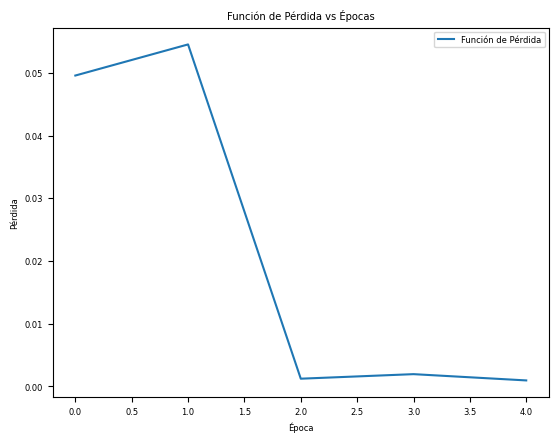

In [19]:
cnn.to(device)
"""
ENTRENAMIENYO
"""
numero_epocas = 5
def entrenar_modelo(mlp, train_loader, criterio, optimizador, numero_epocas):#loaders
  # Listas para almacenar la pérdida y las épocas
  losses = []
  epochs = []
  cnn.train()
  # Train the model
  total_step = len(train_loader)
  print ("Númnero de minibatch = ", total_step)

  for epoch in range(numero_epocas):
    for i, (images, labels) in enumerate(train_loader):
      # Reiniciar los gradientes
      optimizador.zero_grad()

      # obtener las entradas (images): (BATCH_SIZE,1,28,28)
      images = Variable(images.to(device))
      labels = Variable(labels.to(device))
      """
      Forward pass
      """

      # predecir las clases usando las imágenes del set de entrenamiento

      outputs = cnn(images)#[0]
      """
      Backward
      """
      # la pérdida

      loss = criterio(outputs, labels) # y_train = batch_y
      # Backward pass (calcular gradientes)
      loss.backward()
      # Actualizar parámetros
      optimizador.step()
      # desplegar valor de la pérdida cada 100 a medida que avanza el entrenamiento
      if (i+1) % 100 == 0:
        print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch + 1,numero_epocas, i + 1, total_step, loss.item()))
    # Almacenar la pérdida y el número de época
    losses.append(loss.item())
    epochs.append(epoch)
  return losses, epochs
"""
FUNCIÓN DE PÉRDIDA Y OPTIMIZADOR
"""
criterio = nn.CrossEntropyLoss()
optimizador = optim.Adam(cnn.parameters(), lr = 0.001)
# entrenar
losses, epochs = entrenar_modelo(cnn, train_loader, criterio,
optimizador,numero_epocas)#loaders
"""
TESTEO
"""
def testear():
  # Test the model
  cnn.eval()
  accuracy = 0.0
  total = 0.0
  with torch.no_grad():
    for data in test_loader:
      images, labels = data
      # correr el model ocon el set de testeo para predecir las etiquetas (labels)
      # obtener las entradas (images): (BATCH_SIZE,1,28,28)
      outputs = cnn(images.to(device))
      # el label con mayor probabilidad (mayor "peso") será la predicción (y_hat)
      _ , y_hat = torch.max(outputs.data, 1)
      total += labels.size(0)
      accuracy +=(y_hat == labels.to(device)).sum().item()
  # computar la accuracy sobre el set de testeo
  accuracy = (100*accuracy/total)
  return accuracy
# testear
accuracy = testear()
print("acurracy= ", accuracy)
"""
VISUALIZACIÓN
"""
def visualizar_funcion_perdida():
  # Representación gráfica
  # Tamaño de las fuentes
  plt.rcParams.update({'font.size': 6})
  # Gráfica de la función de pérdida
  plt.plot(epochs, losses, label='Función de Pérdida')
  plt.xlabel('Época')
  plt.ylabel('Pérdida')
  plt.title('Función de Pérdida vs Épocas')
  plt.legend()
  plt.show()
# visualizar evolución de la función de pérdida
visualizar_funcion_perdida()

##$CNN\ con\ pytorch\ CIFAR10$


In [22]:
#app_15.4

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(device)

"""
EL DATASET
"""
# Cargar las imágenes MNIST.
# En la cargada se usó ToTensor para simultaneamente
# convertir las imágenes en tensores PyTorch
# normalizados [0.0, 1.0]
transform = transforms.Compose([
transforms.ToTensor()])
# CIFAR10 ya lo tenía en disco
train_data = datasets.CIFAR10(root='./data',train=True,transform=transform,download=True)
test_data = datasets.CIFAR10(root='./data',train=False,transform=transform,download=True)


cuda


###$Data\ set\ explored$

Clases = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


Shape train: (50000, 32, 32, 3)
Dim train: 4


Shape test: (10000, 32, 32, 3)
Dim test: 4


Shape de imagen de entrenamiento en la posición 50: torch.Size([3, 32, 32])
Dim de imagen de entrenamiento en la posición 50: torch.Size([3, 32, 32])
Etiqueta corresponsdiente a la imagen en la posición 50: 9


Los valores están ya normalizados entre -1 y 1:
Min: 0.0313725508749485
Max: 0.9529411792755127
Media: 0.3690691292285919


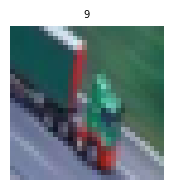

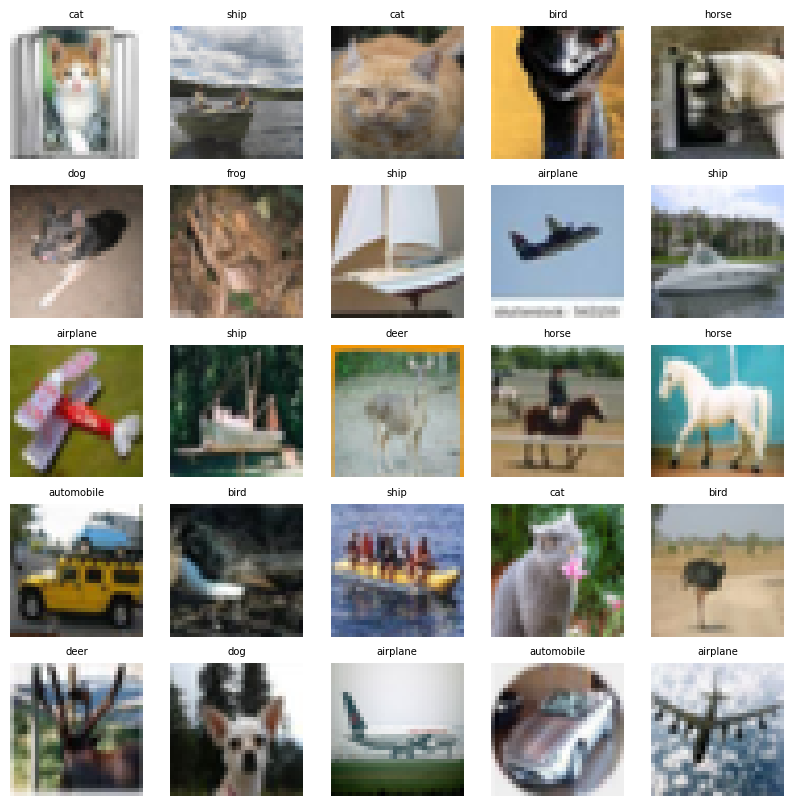

In [23]:
"""
EXPLORANDO UN POCO EL DATASET
"""
# las clases
clases = train_data.classes
print ("Clases =", clases)
print("\n")
print("Shape train:", train_data.data.shape)
x = torch.from_numpy(train_data.data)
print("Dim train:", x.dim())
# Conjunto de testeo
print("\n")
print("Shape test:", test_data.data.shape)
x = torch.from_numpy(train_data.data)
print("Dim test:", x.dim())
# Explorar la imágen en la posición 50 de train
imagen, etiqueta = train_data[50]
print("\n")
print("Shape de imagen de entrenamiento en la posición 50:",imagen.shape)
print("Dim de imagen de entrenamiento en la posición 50:",imagen.shape)
print("Etiqueta corresponsdiente a la imagen en la posición 50:",etiqueta)
print("\n")
print("Los valores están ya normalizados entre -1 y 1:")
print(f"Min: {imagen.min()}")
print(f"Max: {imagen.max()}")
print(f"Media: {imagen.mean()}")
figure = plt.figure(figsize=(2, 2))
plt.title(etiqueta)
plt.axis("off")
# es necesario permutar el tensor ya que matplotib trabaja es así: (32,32,3)
# y el tensor viene con PyTorch asi:(3,32,32)
imagen = imagen.permute(1, 2, 0)
plt.imshow(imagen)
plt.show()
# Desplegar un conjunto al azar de 25 imágenes de entrenamiento
figure = plt.figure(figsize=(10, 10))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
  sample_idx = torch.randint(len(train_data), size=(1,)).item()
  imagen, label = train_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(clases[label])
  plt.axis("off")
  # permutar tensor
  imagen = imagen.permute(1,2,0)
  plt.imshow(imagen, cmap="gray")
plt.show()

###$Diseño\ y\ Arquitectura$

In [30]:
# Organizar el dataset en minilotes escogidos al azar para
# un mejor y mas rápido entrenamiento
torch.manual_seed(5) # semilla
# tamaño del lote
# MNIST consiste de 60K imágenes de entrenamiento y 10K imágenes de testeo
# Se elgirá un batc_size de 100 para tener 600 lotes de imagenes para
# entrenamineto y 100 para testeo
BATCH_SIZE = 100
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
test_loader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
"""
ARQUITECTURA DE LA RED CNN PROPUESTA
"""
class CNN_CIFAR10(nn.Module):
  def __init__(self):
    super(CNN_CIFAR10, self).__init__()
    # Declarar todas las capas para la extracción de características
    self.features = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.Conv2d(32, 32, 3, 1, 1),
    nn.MaxPool2d(2), # 14X14
    nn.Conv2d(32, 64, 3, 1, 1),
    nn.ReLU(),
    nn.Conv2d(64, 32, 3, 1, 1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(32, 32, 3, 1, 1),
    nn.ReLU())
    # Declarar todas las capas para clasificación
    self.clasificacion = nn.Sequential(
    nn.Flatten(),
    nn.Linear(32 * 7 * 7, 1024),
    nn.ReLU(),
    nn.Linear(1024, 512),
    nn.ReLU(),
    # fully connected layer, output 10 classes
    nn.Linear(512, 10)
    )
  def forward(self, x):
    # Apicar la extracción de características
    x = self.features(x)
    # Clasificar las imágenes
    output = self.clasificacion(x)
    return output

# Instanciar el modelo
cnn = CNN_CIFAR10()
"""
INFORMACIÓN DE LA ARQUITECTURA DE LA RED NEURONAL
"""
print("\n")
print("El modelo:\n\n",cnn)
# input_size = (tamaño del batch, número de canales de las imagenes, tamaño de las imágenes)
print("\n")
print("Resumen de los parámetros:\n")
#summary(cnn,input_size=(BATCH_SIZE, 1, 32, 32))



El modelo:

 CNN_CIFAR10(
  (features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU()
  )
  (clasificacion): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1568, out_features=1024, bias=True)
    (2): ReLU()
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): ReLU()
    (5): Linear(in_features=512, out_features=10, bias=True)
  )
)


Resumen de los parámetros:



###$Entrenamiento\ y\ Testeo\ CIFAR10$

cuda
Númnero de minibatch =  500
Epoch [1/15], Step [100/500], Loss: 1.7636
Epoch [1/15], Step [200/500], Loss: 1.4453
Epoch [1/15], Step [300/500], Loss: 1.3449
Epoch [1/15], Step [400/500], Loss: 1.3321
Epoch [1/15], Step [500/500], Loss: 1.1802
Epoch [2/15], Step [100/500], Loss: 1.2783
Epoch [2/15], Step [200/500], Loss: 1.1923
Epoch [2/15], Step [300/500], Loss: 1.2628
Epoch [2/15], Step [400/500], Loss: 1.0746
Epoch [2/15], Step [500/500], Loss: 1.0080
Epoch [3/15], Step [100/500], Loss: 1.1856
Epoch [3/15], Step [200/500], Loss: 1.0973
Epoch [3/15], Step [300/500], Loss: 0.9766
Epoch [3/15], Step [400/500], Loss: 0.8861
Epoch [3/15], Step [500/500], Loss: 0.9059
Epoch [4/15], Step [100/500], Loss: 0.7493
Epoch [4/15], Step [200/500], Loss: 0.7101
Epoch [4/15], Step [300/500], Loss: 0.8718
Epoch [4/15], Step [400/500], Loss: 0.7606
Epoch [4/15], Step [500/500], Loss: 0.7661
Epoch [5/15], Step [100/500], Loss: 0.7053
Epoch [5/15], Step [200/500], Loss: 0.7408
Epoch [5/15], Step [3

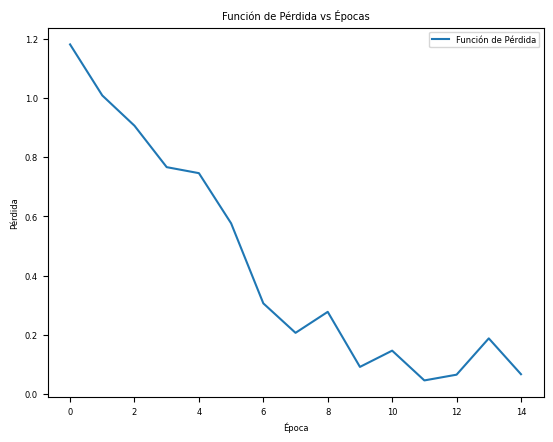

In [35]:
#app_15.7
import torch
import torch.nn as nn
from torch import optim
from torchvision.transforms import ToTensor
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torch.autograd import Variable
# Por costumbre siempre indagar por la GPU, sin embargo, en este ejemplo se ejecutará en CPU
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(device)
"""
EL DATASET
"""
# Cargar las imágenes CIFAR10.
# En la cargada se usó ToTensor para simultaneamente
# convertir las imágenes en tensores PyTorch
# normalizados [0.0, 1.0]
transform = transforms.Compose([transforms.Resize((28, 28)),transforms.ToTensor()])
train_data = datasets.CIFAR10('./data',train=True,transform=transform,download=True)
test_data = datasets.CIFAR10('./data',train=False,transform=transform,download=True)
# Organizar el dataset en minilotes escogidos al azar para
# un mejor y mas rápido entrenamiento
torch.manual_seed(5) # semilla
# tamaño del lote
# CIFAR10 consiste de 60K imágenes de entrenamiento y 10K imágenes de testeo
# Se elgirá un batc_size de 100 para tener 600 lotes de imagenes para
# entrenamineto y 100 para testeo
BATCH_SIZE = 100


train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
test_loader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
"""
ARQUITECTURA DE LA RED CNN PROPUESTA
"""
class CNN_CIFAR10(nn.Module):
  def __init__(self):
    super(CNN_CIFAR10, self).__init__()
    # Declarar todas las capas para la extracción de características
    self.features = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.Conv2d(32, 32, 3, 1, 1),
    nn.MaxPool2d(2), # 14X14
    nn.Conv2d(32, 64, 3, 1, 1),
    nn.ReLU(),
    nn.Conv2d(64, 32, 3, 1, 1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(32, 32, 3, 1, 1),
    nn.ReLU())
    # Declarar todas las capas para clasificación
    self.clasificacion = nn.Sequential(
    nn.Flatten(),
    nn.Linear(32 * 7 * 7, 1024),
    nn.ReLU(),
    nn.Linear(1024, 512),
    nn.ReLU(),
    # fully connected layer, output 10 classes
    nn.Linear(512, 10))
  def forward(self, x):
    # Apicar la extracción de características
    x = self.features(x)
    # Clasificar las imágenes
    output = self.clasificacion(x)
    return output

# Instanciar el modelo
cnn = CNN_CIFAR10()
"""
EJECUTAR EN GPU
"""
# Se ejecuta en GPU si está disponible
cnn.to(device)

"""
ENTRENAMIENYO
"""
numero_epocas = 15
def entrenar_modelo(mlp, train_loader, criterio, optimizador, numero_epocas):
  # Listas para almacenar la pérdida y las épocas
  losses = []
  epochs = []
  cnn.train()
  # Train the model
  total_step = len(train_loader)
  print ("Númnero de minibatch = ", total_step)
  for epoch in range(numero_epocas):
    for i, (images, labels) in enumerate(train_loader):
      # Reiniciar los gradientes
      optimizador.zero_grad()

      # obtener las entradas (images): (BATCH_SIZE,1,28,28)
      images = Variable(images.to(device))
      labels = Variable(labels.to(device))
      """
      Forward pass
      """
      # predecir las clases usando las imágenes del set de entrenamiento
      outputs = cnn(images)
      """
      Backward
      """
      # la pérdida
      loss = criterio(outputs, labels) # y_train = batch_y
      # Backward pass (calcular gradientes)
      loss.backward()
      # Actualizar parámetros
      optimizador.step()
      # desplegar valor de la pérdida cada 100 a medida que avanza el entrenamiento
      if (i+1) % 100 == 0:
        print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch + 1,numero_epocas, i + 1, total_step, loss.item()))
    # Almacenar la pérdida y el número de época
    losses.append(loss.item())
    epochs.append(epoch)
  return losses, epochs

"""
FUNCIÓN DE PÉRDIDA Y OPTIMIZADOR
"""
criterio = nn.CrossEntropyLoss()
optimizador = optim.Adam(cnn.parameters(), lr = 0.001)
# entrenar
losses, epochs = entrenar_modelo(cnn, train_loader, criterio,optimizador,numero_epocas) #loaders


"""
TESTEO
"""
def testear():
  # Test the model
  cnn.eval()
  accuracy = 0.0
  total = 0.0
  with torch.no_grad():
    for data in test_loader:
      images, labels = data
      # correr el model ocon el set de testeo para predecir las etiquetas (labels)
      # obtener las entradas (images): (BATCH_SIZE,1,28,28)
      outputs = cnn(images.to(device))
      # el label con mayor probabilidad (mayor "peso") será la predicción (y_hat)
      _ , y_hat = torch.max(outputs.data, 1)
      total += labels.size(0)
      accuracy +=(y_hat == labels.to(device)).sum().item()
    # computar la accuracy sobre el set de testeo
    accuracy = (100*accuracy/total)
  return accuracy



# testear
accuracy = testear()
print("acurracy= ", accuracy)
"""
VISUALIZACIÓN
"""
def visualizar_funcion_perdida():
  # Representación gráfica
  # Tamaño de las fuentes
  plt.rcParams.update({'font.size': 6})
  # Gráfica de la función de pérdida
  plt.plot(epochs, losses, label='Función de Pérdida')
  plt.xlabel('Época')
  plt.ylabel('Pérdida')
  plt.title('Función de Pérdida vs Épocas')
  plt.legend()
  plt.show()
# visualizar evolución de la función
visualizar_funcion_perdida()

###$pruebas\ de\ un\ nuevo\ modelo$

cuda
Númnero de minibatch =  500
Epoch [1/15], Step [100/500], Loss: 1.8813
Epoch [1/15], Step [200/500], Loss: 1.6007
Epoch [1/15], Step [300/500], Loss: 1.4874
Epoch [1/15], Step [400/500], Loss: 1.4083
Epoch [1/15], Step [500/500], Loss: 1.3143
Epoch [2/15], Step [100/500], Loss: 1.4065
Epoch [2/15], Step [200/500], Loss: 1.3539
Epoch [2/15], Step [300/500], Loss: 1.3034
Epoch [2/15], Step [400/500], Loss: 1.1297
Epoch [2/15], Step [500/500], Loss: 1.1609
Epoch [3/15], Step [100/500], Loss: 1.2636
Epoch [3/15], Step [200/500], Loss: 1.1196
Epoch [3/15], Step [300/500], Loss: 0.9929
Epoch [3/15], Step [400/500], Loss: 0.8904
Epoch [3/15], Step [500/500], Loss: 1.0719
Epoch [4/15], Step [100/500], Loss: 0.7936
Epoch [4/15], Step [200/500], Loss: 0.7329
Epoch [4/15], Step [300/500], Loss: 0.8098
Epoch [4/15], Step [400/500], Loss: 0.8337
Epoch [4/15], Step [500/500], Loss: 0.7495
Epoch [5/15], Step [100/500], Loss: 0.8476
Epoch [5/15], Step [200/500], Loss: 0.6914
Epoch [5/15], Step [3

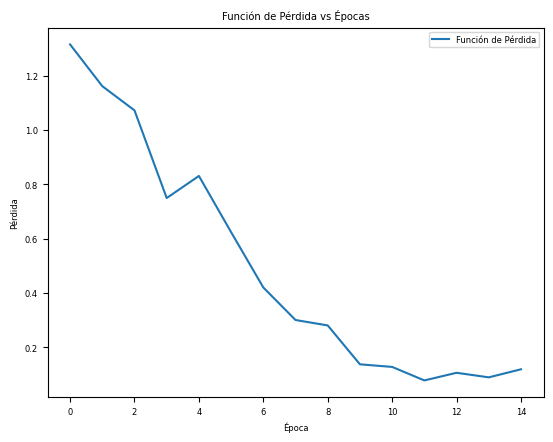

In [38]:
#app_15.8
import torch
import torch.nn as nn
from torch import optim
from torchvision.transforms import ToTensor
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torch.autograd import Variable
# Por costumbre siempre indagar por la GPU, sin embargo, en este ejemplo se ejecutará en CPU
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(device)
"""
EL DATASET
"""
# Cargar las imágenes CIFAR10.
# En la cargada se usó ToTensor para simultaneamente
# convertir las imágenes en tensores PyTorch
# normalizados [0.0, 1.0]
transform = transforms.Compose([transforms.Resize((28, 28)),transforms.ToTensor()])
train_data = datasets.CIFAR10('./data',train=True,transform=transform,download=True)
test_data = datasets.CIFAR10('./data',train=False,transform=transform,download=True)
# Organizar el dataset en minilotes escogidos al azar para
# un mejor y mas rápido entrenamiento
torch.manual_seed(5) # semilla
# tamaño del lote
# CIFAR10 consiste de 60K imágenes de entrenamiento y 10K imágenes de testeo
# Se elgirá un batc_size de 100 para tener 600 lotes de imagenes para
# entrenamineto y 100 para testeo
BATCH_SIZE = 100
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
test_loader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
"""
ARQUITECTURA DE LA RED CNN PROPUESTA
"""
class CNN_CIFAR10(nn.Module):
  def __init__(self):
    super(CNN_CIFAR10, self).__init__()
    # Declarar todas las capas para la extracción de características
    self.conv_1=nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1,padding=1)
    self.conv_2 = nn.Conv2d(32, 32, 3, 1, 1)
    self.conv_3 = nn.Conv2d(32, 64, 3, 1, 1)
    self.conv_4 = nn.Conv2d(64, 32, 3, 1, 1)
    self.conv_5 = nn.Conv2d(32, 32, 3, 1, 1)
    self.max_pool = nn.MaxPool2d(2)
    self.relu = nn.ReLU()
    # Declarar todas las capas para clasificación
    self.clasificacion = nn.Sequential(
    nn.Flatten(),
    nn.Linear(32 * 7 * 7, 1024),
    nn.ReLU(),
    nn.Linear(1024, 512),
    nn.ReLU(),
    # fully connected layer, output 10 classes
    nn.Linear(512, 10))
  def forward(self, x):
    # Aplicar la extracción de características
    layers = []
    x = self.conv_1(x)
    x = self.relu(x)
    x = self.conv_2(x)
    x = self.relu(x)
    x = self.max_pool(x)
    x = self.conv_3(x)
    x = self.relu(x)
    x = self.conv_4(x)
    x = self.relu(x)
    x = self.max_pool(x)
    x = self.conv_5(x)
    x = self.relu(x)
    # Clasificar las imágenes
    output = self.clasificacion(x)
    return output
# Instanciar el modelo
cnn = CNN_CIFAR10()
"""
EJECUTAR EN GPU
"""
# Se ejecuta en GPU si está disponible
cnn.to(device)
"""
ENTRENAMIENYO
"""
numero_epocas = 15
def entrenar_modelo(mlp, train_loader, criterio, optimizador, numero_epocas):
  # Listas para almacenar la pérdida y las épocas
  losses = []
  epochs = []
  cnn.train()
  # Train the model
  total_step = len(train_loader)
  print ("Númnero de minibatch = ", total_step)
  for epoch in range(numero_epocas):
    for i, (images, labels) in enumerate(train_loader):
      # Reiniciar los gradientes
      optimizador.zero_grad()
      # obtener las entradas (images): (BATCH_SIZE,1,28,28)

      images = Variable(images.to(device))
      labels = Variable(labels.to(device))
      """
      Forward pass
      """
      # predecir las clases usando las imágenes del set de entrenamiento
      outputs = cnn(images)
      """
      Backward
      """
      # la pérdida
      loss = criterio(outputs, labels) # y_train = batch_y
      # Backward pass (calcular gradientes)
      loss.backward()
      # Actualizar parámetros
      optimizador.step()
      # desplegar valor de la pérdida cada 100 a medida que avanza el entrenamiento
      if (i+1) % 100 == 0:
        print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch + 1,numero_epocas, i + 1, total_step, loss.item()))
    # Almacenar la pérdida y el número de época
    losses.append(loss.item())
    epochs.append(epoch)
  return losses, epochs
"""
FUNCIÓN DE PÉRDIDA Y OPTIMIZADOR
"""
criterio = nn.CrossEntropyLoss()
optimizador = optim.Adam(cnn.parameters(), lr = 0.001)
# entrenar
losses, epochs = entrenar_modelo(cnn, train_loader, criterio,
optimizador,numero_epocas)#loaders
"""
TESTEO
"""
def testear():
  # Test the model
  cnn.eval()
  accuracy = 0.0
  total = 0.0
  with torch.no_grad():
    for data in test_loader:
      images, labels = data
      # correr el model ocon el set de testeo para predecir las etiquetas (labels)
      # obtener las entradas (images): (BATCH_SIZE,1,28,28)
      outputs = cnn(images.to(device))
      # el label con mayor probabilidad (mayor "peso") será la predicción (y_hat)
      _ , y_hat = torch.max(outputs.data, 1)
      total += labels.size(0)
      accuracy +=(y_hat == labels.to(device)).sum().item()
  # computar la accuracy sobre el set de testeo
  accuracy = (100*accuracy/total)
  return accuracy
# testear
accuracy = testear()
print("acurracy= ", accuracy)
"""
VISUALIZACIÓN
"""
def visualizar_funcion_perdida():
  # Representación gráfica
  # Tamaño de las fuentes
  plt.rcParams.update({'font.size': 6})
  # Gráfica de la función de pérdida
  plt.plot(epochs, losses, label='Función de Pérdida')
  plt.xlabel('Época')
  plt.ylabel('Pérdida')
  plt.title('Función de Pérdida vs Épocas')
  plt.legend()
  plt.show()
# visualizar evolución de la función de pérdida
visualizar_funcion_perdida()

#guardamos el modelo con los parametros ya entrenados y testeados
torch.save(cnn.state_dict(), "mi_modelo_cnn_cifar10.pt")

###$Pruebas\ del\ modelo$


cuda
acurracy=  70.48


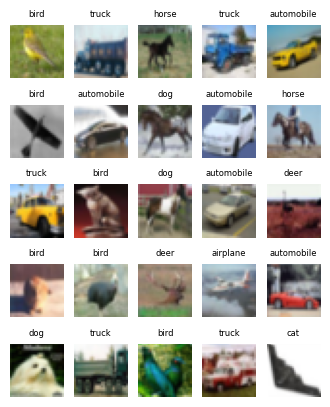

In [40]:
#app_15.9
import torch
import torch.nn as nn
from torchvision.transforms import ToTensor
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
# Por costumbre siempre indagar por la GPU, sin embargo, en este ejemplo se ejecutará en CPU
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(device)

"""
EL DATASET
"""
# Cargar las imágenes CIFAR10.
# En la cargada se usó ToTensor para simultaneamente
# convertir las imágenes en tensores PyTorch
# normalizados [0.0, 1.0]
transform = transforms.Compose([transforms.Resize((28, 28)),transforms.ToTensor()])
test_data = datasets.CIFAR10('./data',train=False,transform=transform,download=True)
# Organizar el dataset en minilotes escogidos al azar para
# un mejor y mas rápido entrenamiento
torch.manual_seed(5) # semilla
# tamaño del lote
BATCH_SIZE = 25
test_loader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
"""
ARQUITECTURA DE LA RED CNN PROPUESTA
"""
class CNN_CIFAR10(nn.Module):
  def __init__(self):
    super(CNN_CIFAR10, self).__init__()
    # Declarar todas las capas para la extracción de características
    self.conv_1=nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1,padding=1)
    self.conv_2 = nn.Conv2d(32, 32, 3, 1, 1)
    self.conv_3 = nn.Conv2d(32, 64, 3, 1, 1)
    self.conv_4 = nn.Conv2d(64, 32, 3, 1, 1)
    self.conv_5 = nn.Conv2d(32, 32, 3, 1, 1)
    self.max_pool_1 = nn.MaxPool2d(2)
    self.max_pool_2 = nn.MaxPool2d(2)
    self.relu_1 = nn.ReLU()
    self.relu_2 = nn.ReLU()
    self.relu_3 = nn.ReLU()
    self.relu_4 = nn.ReLU()
    # Declarar todas las capas para clasificación
    self.clasificacion = nn.Sequential(
    nn.Flatten(),
    nn.Linear(32 * 7 * 7, 1024),
    nn.ReLU(),
    nn.Linear(1024, 512),
    nn.ReLU(),
    # fully connected layer, output 10 classes
    nn.Linear(512, 10))
  def forward(self, x):
    # Aplicar la extracción de características
    layers = []
    x = self.conv_1(x)
    x = self.relu_1(x)
    x = self.conv_2(x)
    x = self.relu_2(x)
    x = self.max_pool_1(x)
    x = self.conv_3(x)
    x = self.relu_3(x)
    x = self.conv_4(x)
    x = self.relu_2(x)
    x = self.max_pool_2(x)
    x = self.conv_5(x)
    x = self.relu_4(x)
    # Clasificar las imágenes
    output = self.clasificacion(x)
    return output
"""
EJECUTAR EN GPU
"""
model = CNN_CIFAR10()
model.load_state_dict(torch.load("mi_modelo_cnn_cifar10.pt"))
model.to(device)
model.eval()


"""
PREDECIR
"""
#tomar 25 imágenes del dataset test con sus label
def predecir():
  #model.eval()
  accuracy = 0.0
  total = 0.0
  contador =0
  imagenes_lote_elegido = []
  labels_true_lote_elegido = []
  labels_pred_lote_elegido = []
  with torch.no_grad():
  # Hay 400 lotes de 25
    for data in test_loader:
      images, labels = data
      # correr el model con el set de testeo para predecir las etiquetas (labels)
      # obtener las entradas (images): (BATCH_SIZE,1,28,28)
      outputs = model(images.to(device))
      # el label con mayor probabilidad (mayor "peso") será la predicción (y_hat)
      _ , y_hat = torch.max(outputs.data, 1)
      total += labels.size(0)
      accuracy +=(y_hat == labels.to(device)).sum().item()
      contador = contador +1
      if (contador==210):#seleccionar lote 210 para visualizar
        imagenes_lote_elegido =images
        labels_true_lote_elegido = labels
        labels_pred_lote_elegido = y_hat
  # computar la accuracy sobre el set de predicción
  accuracy = (100*accuracy/total)
  return accuracy, imagenes_lote_elegido, labels_true_lote_elegido,labels_pred_lote_elegido
# predecir
accuracy, imagenes_lote_elegido, labels_true_lote_elegido, labels_pred_lote_elegido = predecir()
print("acurracy= ", accuracy)

"""
VISUALIZACIÓN
"""
clases = test_data.classes
# Desplegar un conjunto al azar de 25 imágenes de entrenamiento
figure = plt.figure(figsize=(4, 5))
# Tamaño de las fuentes
plt.rcParams.update({'font.size': 5})
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
  #sample_idx = torch.randint(len(train_data), size=(1,)).item()
  #imagen, label = train_data[sample_idx]
  imagen = imagenes_lote_elegido[i-1]
  label = labels_pred_lote_elegido[i-1]
  figure.add_subplot(rows, cols, i)
  plt.title(clases[label])
  plt.axis("off")
  # permutar tensor
  imagen = imagen.permute(1,2,0)
  plt.imshow(imagen, cmap="gray")
plt.show()

###$ ¿Que\ ve\ una\ CNN? $

cuda


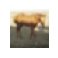

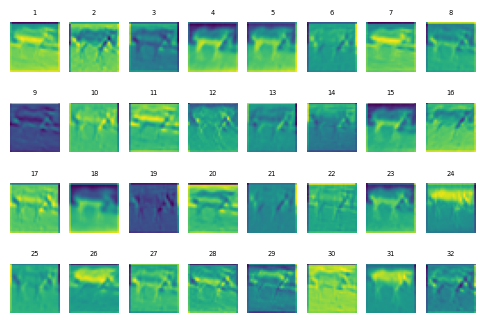

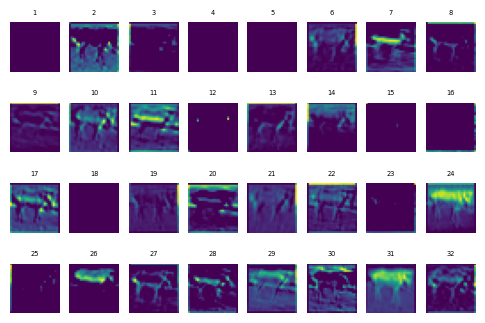

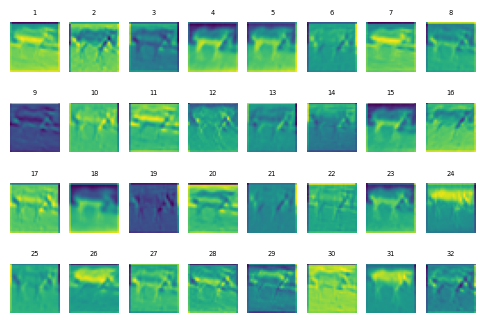

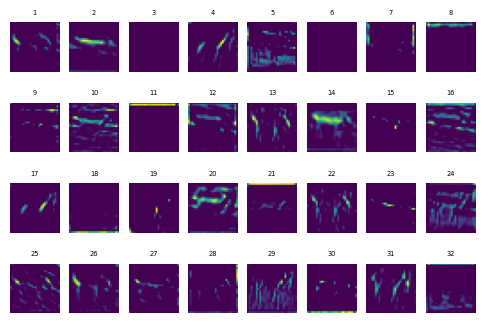

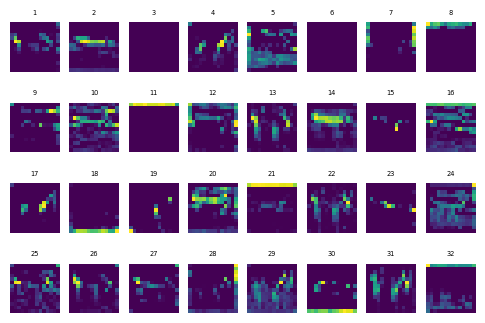

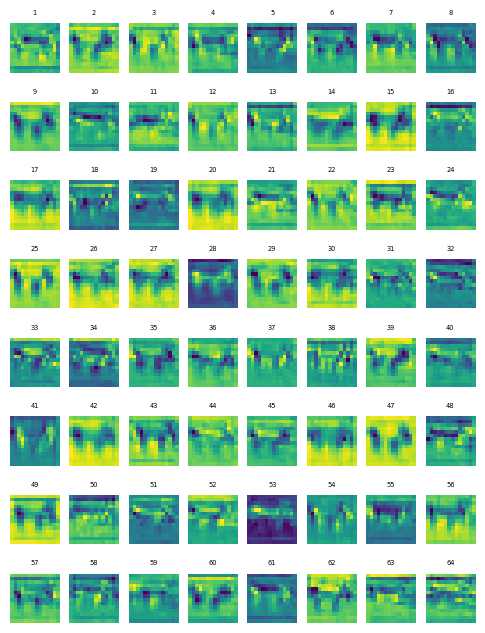

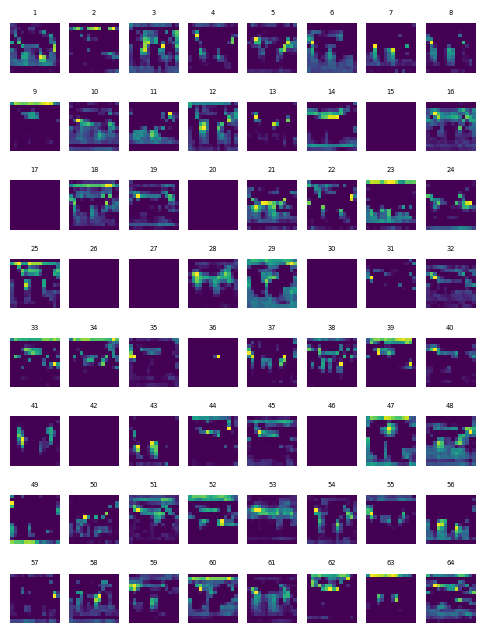

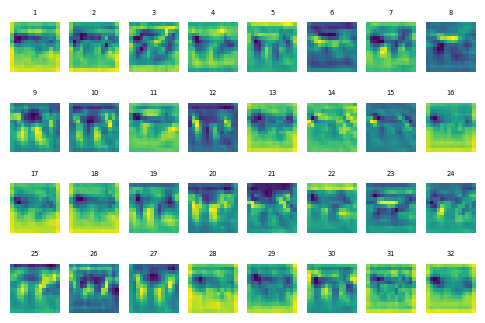

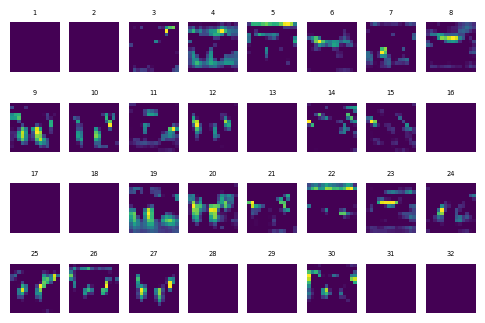

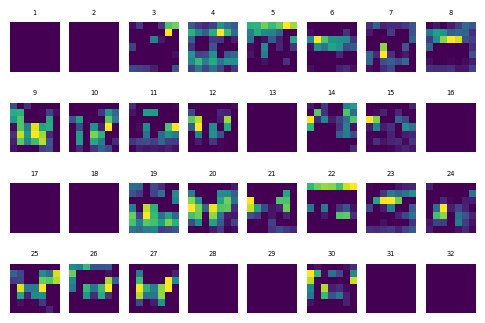

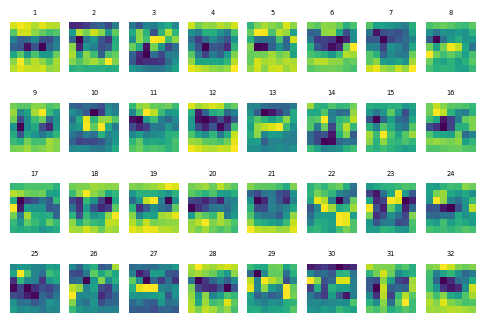

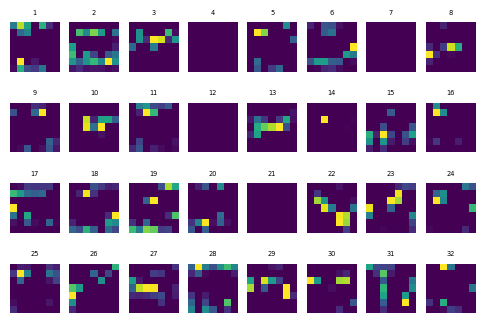

In [41]:
#app_15.10
import torch
import torch.nn as nn
from torchvision.transforms import ToTensor
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Por costumbre siempre indagar por la GPU, sin embargo, en este ejemplo se ejecutará en CPU
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(device)
"""
EL DATASET
"""
# Cargar las imágenes CIFAR10.
# En la cargada se usó ToTensor para simultaneamente
# convertir las imágenes en tensores PyTorch
# normalizados [0.0, 1.0]
transform = transforms.Compose([transforms.Resize((28, 28)),transforms.ToTensor()])
train_data = datasets.CIFAR10('./data',train=True,transform=transform,download=True)
#test_data = datasets.CIFAR10('./data',train=False,transform=transform,download=True)

"""
ARQUITECTURA DE LA RED CNN PROPUESTA
"""
class CNN_CIFAR10(nn.Module):
  def __init__(self):
    super(CNN_CIFAR10, self).__init__()
    # Declarar todas las capas para la extracción de características
    self.conv_1=nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1,padding=1)
    self.conv_2 = nn.Conv2d(32, 32, 3, 1, 1)
    self.conv_3 = nn.Conv2d(32, 64, 3, 1, 1)
    self.conv_4 = nn.Conv2d(64, 32, 3, 1, 1)
    self.conv_5 = nn.Conv2d(32, 32, 3, 1, 1)
    self.max_pool = nn.MaxPool2d(2)
    self.relu = nn.ReLU()
    # Declarar todas las capas para clasificación
    self.clasificacion = nn.Sequential(
    nn.Flatten(),
    nn.Linear(32 * 7 * 7, 1024),
    nn.ReLU(),
    nn.Linear(1024, 512),
    nn.ReLU(),
    # fully connected layer, output 10 classes
    nn.Linear(512, 10))
def forward(self, x):
  # Aplicar la extracción de características
  layers = []
  x = self.conv_1(x)
  x = self.relu(x)
  x = self.conv_2(x)
  x = self.relu(x)
  x = self.max_pool(x)
  x = self.conv_3(x)
  x = self.relu(x)
  x = self.conv_4(x)
  x = self.relu(x)
  x = self.max_pool(x)
  x = self.conv_5(x)
  x = self.relu(x)
  # Clasificar las imágenes
  output = self.clasificacion(x)
  return output
"""
# Instanciar el modelo
cnn = CNN_CIFAR10()

EJECUTAR EN GPU
# Se ejecuta en GPU si está disponible
cnn.to(device)
"""
model = CNN_CIFAR10()
model.load_state_dict(torch.load("mi_modelo_cnn_cifar10.pt"))
model.to(device)
model.eval()
"""
VISUALIZACIÓN DE CAPAS CONVOLUCIONALES PARA UNA IMAGEN DE PRUEBA
-MAPAS DE CARACTERÍSTICAS (FEATURES) Y KERNELS-
"""
# mapa de features: visualizar las capas convolucionales
# aplicadas a la imagen seleccionada
def visualizar_mapas_features(mapas_features, cols, rows, scale):
  figure = plt.figure(figsize=(6, scale*4))
  # Tamaño de las fuentes
  plt.rcParams.update({'font.size': 4})
  for i in range(1, cols * rows + 1):
    mapa_feature = mapas_features[i-1] # [28, 28]
    figure.add_subplot(rows, cols, i)
    plt.title(i)
    plt.axis("off")
    # permutar tensor
    mapa_feature = mapa_feature.to("cpu").detach().numpy()
    plt.imshow(mapa_feature)
  plt.show()


# Desplegar los mapas y los kernel:
# si conv es de 32: 8 cols, 4 rows, scale = 1
# si conv es de 64: 8 col, 8 rows, scale = 2
cols = 8
rows = 4
scale = 1
# escoger alguna imagen del dataset
imagen, _ = train_data[2000]
# visualizar la imagen
# Matplotlib trabaja con la imagen (32,32,3) y Pytorch (3,32,32)
# por lo tanto hay que permutar)
figure = plt.figure(figsize=(0.5, 1))
imagen_1 = imagen.permute(1,2,0)
plt.axis("off")
plt.imshow(imagen_1, cmap="gray")
plt.show()
# 1: conv_1
mapas_features_1 = model.conv_1(imagen.to(device))
visualizar_mapas_features(mapas_features_1,cols,rows, scale)
# 2: relu
mapas_features_2 = model.relu(mapas_features_1)
visualizar_mapas_features(mapas_features_2,cols,rows, scale)
# 3: conv_2
mapas_features_3 = model.conv_2(mapas_features_2)
visualizar_mapas_features(mapas_features_1,cols,rows, scale)
# 4: relu
mapas_features_4 = model.relu(mapas_features_3)
visualizar_mapas_features(mapas_features_4,cols,rows, scale)
# 5: max_pool
mapas_features_5 = model.max_pool(mapas_features_4)
visualizar_mapas_features(mapas_features_5,cols,rows, scale)
cols = 8
rows = 8
scale = 2
# 6: conv_3
mapas_features_6 = model.conv_3(mapas_features_5)
visualizar_mapas_features(mapas_features_6,cols,rows, scale)
# 7: relu
mapas_features_7 = model.relu(mapas_features_6)
visualizar_mapas_features(mapas_features_7,cols,rows, scale)
cols = 8
rows = 4
scale = 1
# 8: conv_4
mapas_features_8 = model.conv_4(mapas_features_7)
visualizar_mapas_features(mapas_features_8,cols,rows, scale)
# 9: relu
mapas_features_9 = model.relu(mapas_features_8)
visualizar_mapas_features(mapas_features_9,cols,rows, scale)
# 10: max_pool
mapas_features_10 = model.max_pool(mapas_features_9)
visualizar_mapas_features(mapas_features_10,cols,rows, scale)
# 11: conv
mapas_features_11 = model.conv_5(mapas_features_10)
visualizar_mapas_features(mapas_features_11,cols,rows, scale)
# 12: relu
mapas_features_12 = model.relu(mapas_features_11)
visualizar_mapas_features(mapas_features_12,cols,rows, scale)